<a href="https://colab.research.google.com/github/hewettac/OOP-New/blob/main/ORIGINAL_CODE_ML_2_17_26_TTD_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

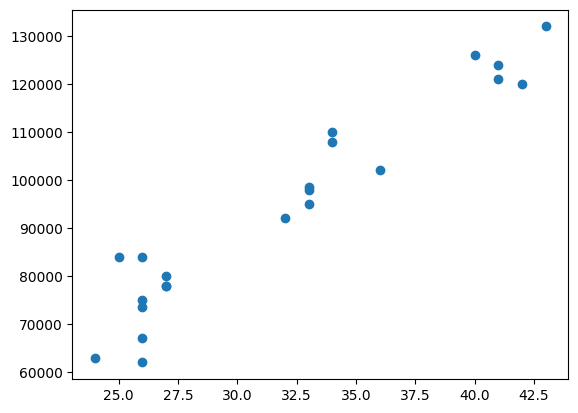

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('data-01.csv')
df.head()

plt.scatter(df.Age, df.Income)
plt.show()

In [11]:
# determine number of clusters
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [12]:
# predict what clusters people fall into
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2],
      dtype=int32)

In [13]:
# assign clusters as column

df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,John,27,80000,1
1,Joe,26,75000,1
2,Mary,26,62000,1
3,Kathy,27,78000,1
4,David,32,92000,2


<function matplotlib.pyplot.show(close=None, block=None)>

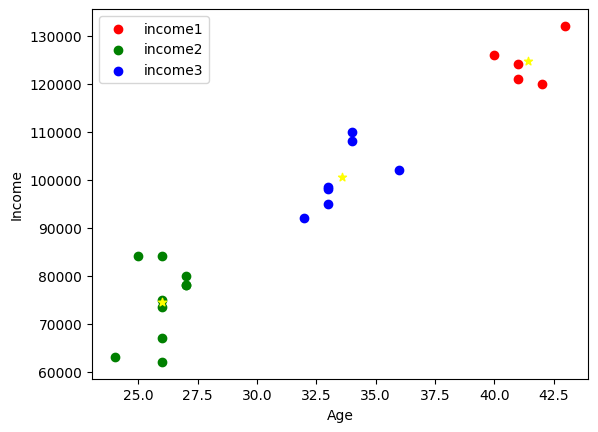

In [17]:
# graph clusters

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1.Income, color = 'red', label = 'income1')
plt.scatter(df2.Age, df2.Income, color = 'green', label = 'income2')
plt.scatter(df3.Age, df3.Income, color = 'blue', label = 'income3')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

# show centroids for each cluster

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', marker = '*')
plt.show

In [30]:
# scale the data within 0-1 range

df_new = df.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_new[['Income']])
df_new['Income'] = scaler.transform(df_new[['Income']])

scaler.fit(df[['Age']])
df_new['Age'] = scaler.transform(df_new[['Age']])
df_new

,Name,Age,Income,cluster
0,John,0.157895,0.257143,1
1,Joe,0.105263,0.185714,1
2,Mary,0.105263,0.000000,1
3,Kathy,0.157895,0.228571,1
4,David,0.421053,0.428571,2
5,Wes,0.526316,0.685714,2
6,Adina,0.105263,0.071429,1
7,Addline,0.894737,0.885714,0
8,Lincy,0.052632,0.314286,1
9,Jeff,0.526316,0.657143,2


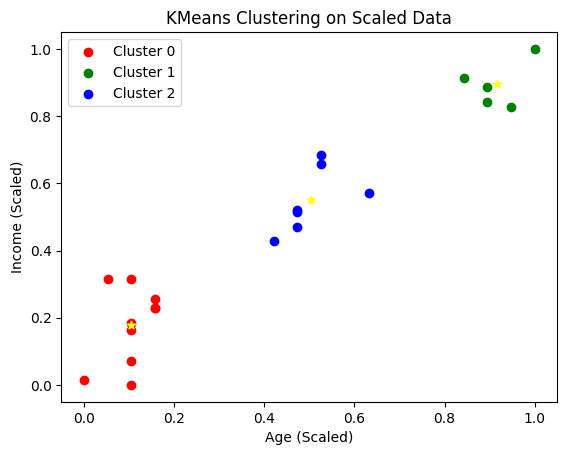

In [31]:
# Re-run KMeans on the scaled data (df_new)
km_scaled = KMeans(n_clusters=3)
y_predicted_scaled = km_scaled.fit_predict(df_new[['Age', 'Income']])

df_new['cluster'] = y_predicted_scaled

# Graph clusters using scaled data from df_new

df1_scaled = df_new[df_new.cluster==0]
df2_scaled = df_new[df_new.cluster==1]
df3_scaled = df_new[df_new.cluster==2]

plt.scatter(df1_scaled.Age, df1_scaled.Income, color = 'red', label = 'Cluster 0')
plt.scatter(df2_scaled.Age, df2_scaled.Income, color = 'green', label = 'Cluster 1')
plt.scatter(df3_scaled.Age, df3_scaled.Income, color = 'blue', label = 'Cluster 2')

plt.xlabel('Age (Scaled)')
plt.ylabel('Income (Scaled)')
plt.legend()

# show centroids for each cluster from the scaled data

plt.scatter(km_scaled.cluster_centers_[:,0], km_scaled.cluster_centers_[:,1], color = 'yellow', marker = '*')
plt.title('KMeans Clustering on Scaled Data')
plt.show()

In [26]:
# find sse values

sse = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income']])
  sse.append(km.inertia_)

sse

[4.318251404313929,
 1.1826873137462346,
 0.2540714144383516,
 0.19588243870955588,
 0.09509369927234843,
 0.11096394180941074,
 0.06166840267963142,
 0.03872141114063351,
 0.0321538173441121]

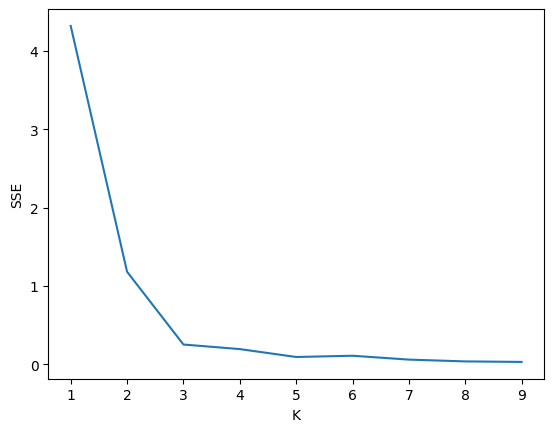

In [27]:
# plot sse and find elbow

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range(1,10),sse)
plt.show()